#*week 1, 2025*  - **VALUE OF LAND OWNED BY GEORGIA NEGROES**


<img width=50% src='https://github.com/ajstarks/dubois-data-portraits/blob/master/challenge/2025/challenge01/original-plate-18.jpg?raw=true'/>

✩ **ingredients**:
* google colab
* python / major librairies: `pandas`, `matplotlib` (i like it for isotypes)
* [Inkscape](https://inkscape.org/fr/) (free and opensource) to draw the purse

✩ **receipt**:

1. create the cash of bag and save the svg
2. Import the data in csv from github
3. `scatterplot` on a fixed X-axis will help having all the points aligned vertically
4. years will be display on Y-axis
5. define the land value in hue so svg size vary with land value
6. adjust and `normalize` the svg size with a new column converting the land value [note: W.E.B. Du Bois did not apply proportional growth to the size of the value]
7. decorate!




In [4]:
#import librairies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from IPython.display import SVG

# Mount Google Drive (run this first in Colab)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


####available fonts

In [8]:
#available fonts
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [6]:
!ls "/content/drive/My Drive/dataviz_challenge_du_bois/bayard_font/"

BAYARD_Regular.ttf


In [7]:
from matplotlib import font_manager
import matplotlib as mpl

# Register the font
font_path = "/content/drive/My Drive/dataviz_challenge_du_bois/bayard_font/BAYARD_Regular.ttf"
bayard_font = font_manager.FontProperties(fname=font_path)

# Test if Matplotlib recognizes it
print("Loaded Font Name:", bayard_font.get_name())

# Apply it to Matplotlib
plt.rcParams["font.family"] = bayard_font.get_name()
mpl.rcParams["font.family"] = bayard_font.get_name()


Loaded Font Name: BAYARD


####import data

In [9]:
#import data
link = 'https://raw.githubusercontent.com/ajstarks/dubois-data-portraits/refs/heads/master/challenge/2025/challenge01/data.csv'
df = pd.read_csv(link)
print(df.dtypes)
df

Year                    int64
Land Value (Dollars)    int64
dtype: object


,Year,Land Value (Dollars)
0,1875,1263902
1,1880,1522173
2,1885,2362889
3,1890,3485176
4,1895,4158960
5,1899,4220120


####import svg

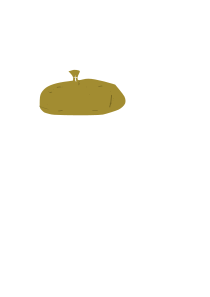

In [10]:
from IPython.display import SVG

# Path to the SVG file in Google Drive
svg_path = "/content/drive/My Drive/dataviz_challenge_du_bois/cashbag2.svg" #https://...
SVG(filename=svg_path)

In [12]:
!pip install cairosvg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.0 MB/s eta 0:00:00


In [13]:
import io
from PIL import Image
from cairosvg import svg2png

# Function to read and convert SVG to an image
def get_svg_image(svg_path, scale=1.0):
    png_bytes = svg2png(url=svg_path, scale=scale) # Convert SVG to PNG
    img = Image.open(io.BytesIO(png_bytes))

    return np.array(img)

####normalize bags size

In [14]:
df.sample(2)

,Year,Land Value (Dollars)
1,1880,1522173
4,1895,4158960


In [15]:
# Normalize sizes for visualization
#df['Y-axis'] = [18,15,12,9,6,3]
#df['X-axis'] = [5,5,5,5,5,5]
df['size WEB'] = [2.5, 3, 3.5, 3.8, 4.2, 4.5] # W.E.B. Du Bois scale
df['size Matplotlib'] = df['size WEB'] *20

In [16]:
df

,Year,Land Value (Dollars),size WEB,size Matplotlib
0,1875,1263902,2.5,50.0
1,1880,1522173,3.0,60.0
2,1885,2362889,3.5,70.0
3,1890,3485176,3.8,76.0
4,1895,4158960,4.2,84.0
5,1899,4220120,4.5,90.0


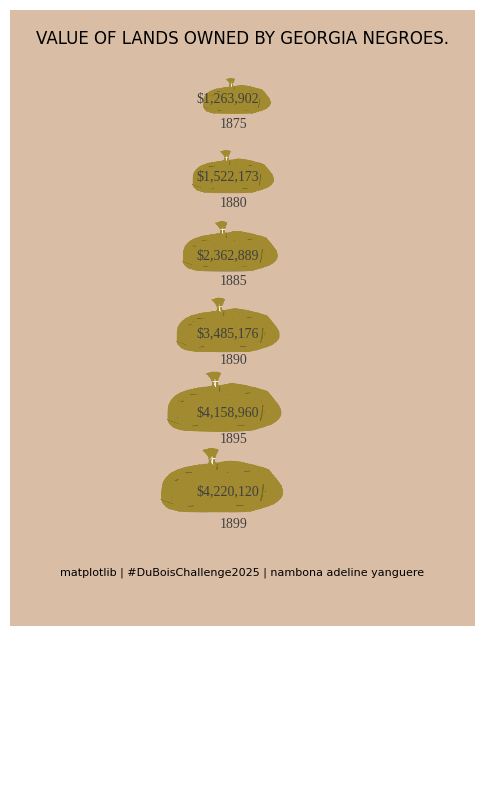

In [22]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Create figure
fig, ax = plt.subplots(figsize=(6, 8))

#general design
ax.set_facecolor('#d9bda5')  # Set background color to old paper
plt.rcParams["font.family"] = "Liberation Sans"


#personalised parameters on x-axis, y-axis

x_fixed = 5.05 # fixed X position
ax.set_xlim(4, 6) # fixed X position bis

padding = 4  # vertical spacing between elements (cf. html)
ax.set_ylim(df['Year'].min() - 20, df['Year'].max() + 50)  # More space at top
y_positions = np.linspace(df['Year'].min(), df['Year'].max() + 40, len(df))
y_adjusted = df['Year'] - 7

#remove ticks & spines
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)

#loop to plot each year
for i, (_, row) in enumerate(df.iterrows()):
    y_pos = y_positions[i]

    image = get_svg_image(svg_path, scale=row['size Matplotlib'] / 100)
    imagebox = OffsetImage(image, zoom=0.3)
    ab = AnnotationBbox(imagebox, (x_fixed, y_pos), frameon=False, xycoords='data', box_alignment=(0.5, 0.5))
    ax.add_artist(ab)

#last design
plt.gca().invert_yaxis()

#title & annotation
plt.text(5, 1858, "VALUE OF LANDS OWNED BY GEORGIA NEGROES.",
         fontsize=12, fontweight="light", fontfamily="sans serif",
         color="black", ha="center", va="top")  # Align text center and top
plt.text(5, 1940, "matplotlib | #DuBoisChallenge2025 | nambona adeline yanguere" ,
         fontsize=8, fontweight="light", fontfamily="sans serif",
         color="black", ha="center", va="top")  # Align text center and top

plt.text(4.8,1869,"$1,263,902", fontsize=10, fontweight="light", fontfamily="Liberation Serif", color="#404040")
plt.text(4.8,1881,"$1,522,173", fontsize=10, fontweight="light", fontfamily="Liberation Serif", color="#404040")
plt.text(4.8,1893,"$2,362,889", fontsize=10, fontweight="light", fontfamily="Liberation Serif", color="#404040")
plt.text(4.8,1905,"$3,485,176", fontsize=10, fontweight="light", fontfamily="Liberation Serif", color="#404040")
plt.text(4.8,1917,"$4,158,960", fontsize=10, fontweight="light", fontfamily="Liberation Serif", color="#404040")
plt.text(4.8,1929,"$4,220,120", fontsize=10, fontweight="light", fontfamily="Liberation Serif", color="#404040")

plt.text(4.9,1873,"1875", fontsize=10, fontweight="light", fontfamily="Liberation Serif", color="#404040")
plt.text(4.9,1885,"1880", fontsize=10, fontweight="light", fontfamily="Liberation Serif", color="#404040")
plt.text(4.9,1897,"1885", fontsize=10, fontweight="light", fontfamily="Liberation Serif", color="#404040")
plt.text(4.9,1909,"1890", fontsize=10, fontweight="light", fontfamily="Liberation Serif", color="#404040")
plt.text(4.9,1921,"1895", fontsize=10, fontweight="light", fontfamily="Liberation Serif", color="#404040")
plt.text(4.9,1934,"1899", fontsize=10, fontweight="light", fontfamily="Liberation Serif", color="#404040")

plt.show()
